# Bezek NI - Robayo PE -  Salveraglio S - Practica 6.2 (Diabetes)


### <b>Paso 0.</b> Importación de librerías

In [1356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### <b>Paso 1.</b> Importamos las funciones de Split y librerias de Keras

In [1357]:
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

### <b>Paso 2.</b> Cargamos el fichero

In [1358]:
df_d = pd.read_csv("../input/diabetes.csv", sep=",")

In [1359]:
df_d.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### <b>Paso 3.</b> Comprovamos los datos cargados con las siguientes funciónes:

* describe
* shape
* nulls
* NaN
* dtype


In [1360]:
# Muestra un resumen de los indicadores estadisticos más usuales, los cuales utilizaremos para 
 # determinar el número inicial de desviaciones estandar para eliminar los outliers
df_d.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [1361]:
# Muestra las dimenciones del dataframe
df_d.shape

(768, 9)

In [1362]:
# No existen valores "null" en ninguna fila ni columna
df_d.isnull().values.any()

False

In [1363]:
# No existen valores "NAN" en ninguna fila ni columna
df_d.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [1364]:
# Comprobamos el tipo de dato para cada columna
df_d.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### <b>Paso 3.1</b> Tareas de ETL y eliminación de outliers

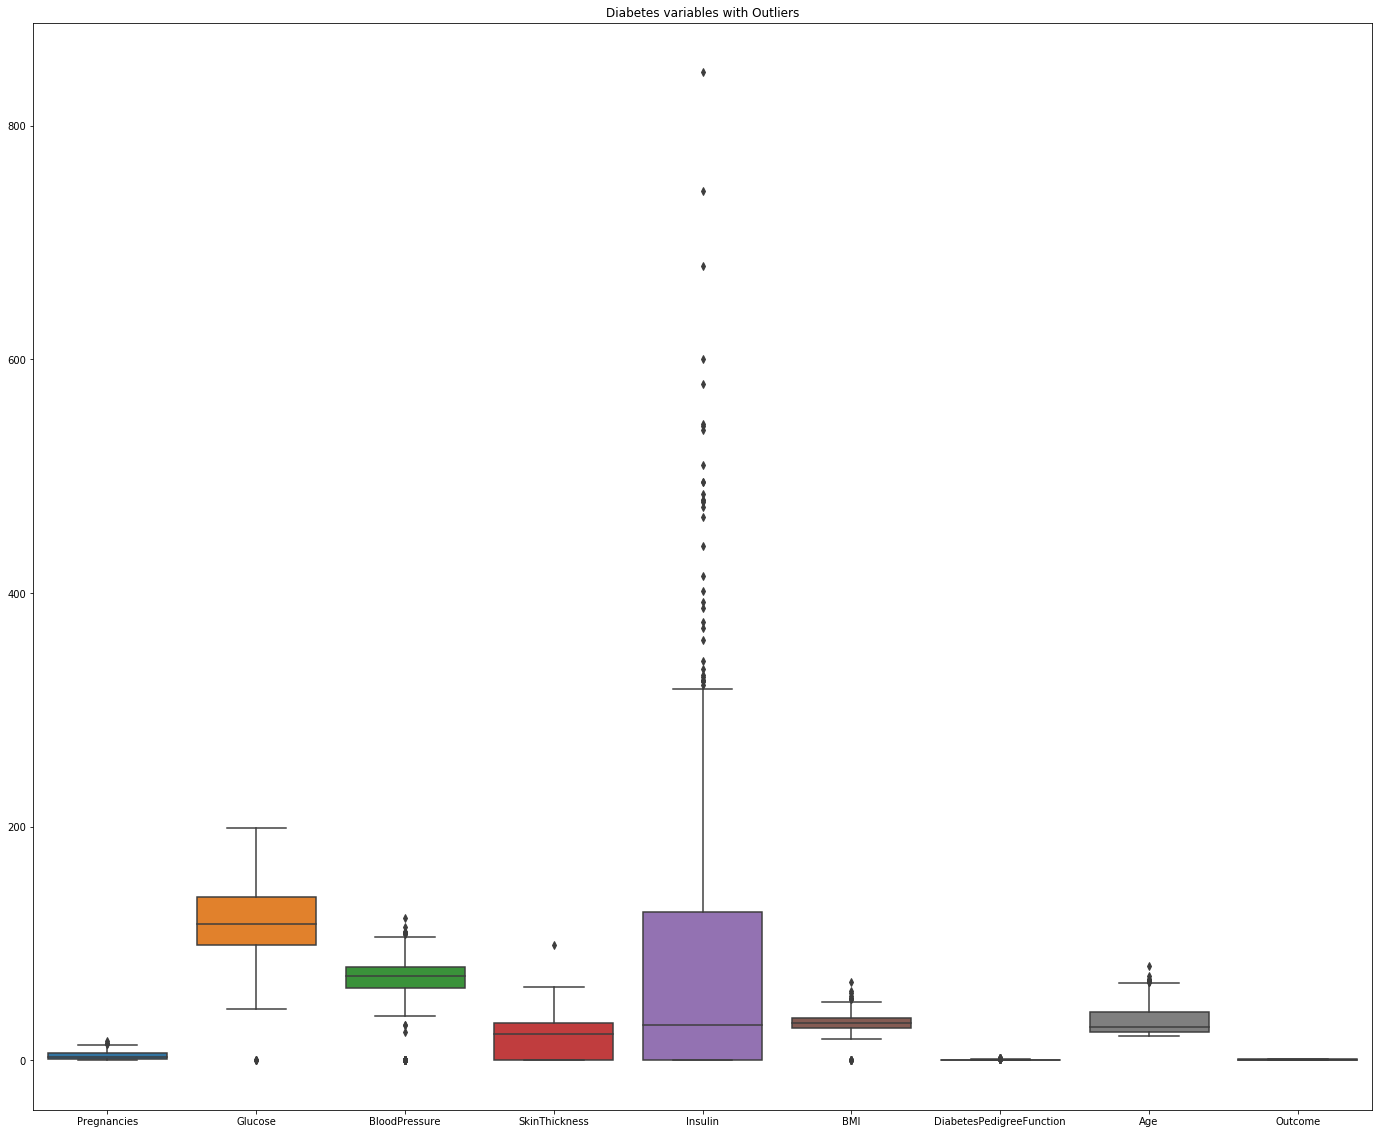

In [1365]:
# Realizamos un análisis grafico con una de las variables con mayor desviación estandar
fig=plt.figure(figsize=(24,20))
df1_box = sns.boxplot(data= df_d).set_title("Diabetes variables with Outliers")

In [1366]:
# Aplicamos la función stats de la libreria scipy con 3 desviaciónes estandar 
 # como margen para eliminar todos los outliers y estandarizar los datos.
from scipy import stats
std = 3
df_test_so=df_d[(np.abs(stats.zscore(df_d)) < std).all(axis=1)]
print("Al definir como limite %s desviaciones estandar, se redujo la dimensión del dataset desde %s a %s, es decir %s filas menos" 
      % (std,df_d.shape[0], df_test_so.shape[0],df_d.shape[0]-df_test_so.shape[0]))
print("La reducción anterior representa un %f del total de registros del dataset original" % ((df_d.shape[0]-df_test_so.shape[0])/df_d.shape[0]*100))

Al definir como limite 3 desviaciones estandar, se redujo la dimensión del dataset desde 768 a 688, es decir 80 filas menos
La reducción anterior representa un 10.416667 del total de registros del dataset original


#### Nota: Con 3 desv std y perdemos 80 registros (un 10% del dataset), por lo que decidimos fijar este parametro en 3 versus las anteriores iteraciónes con menos desviaciones.

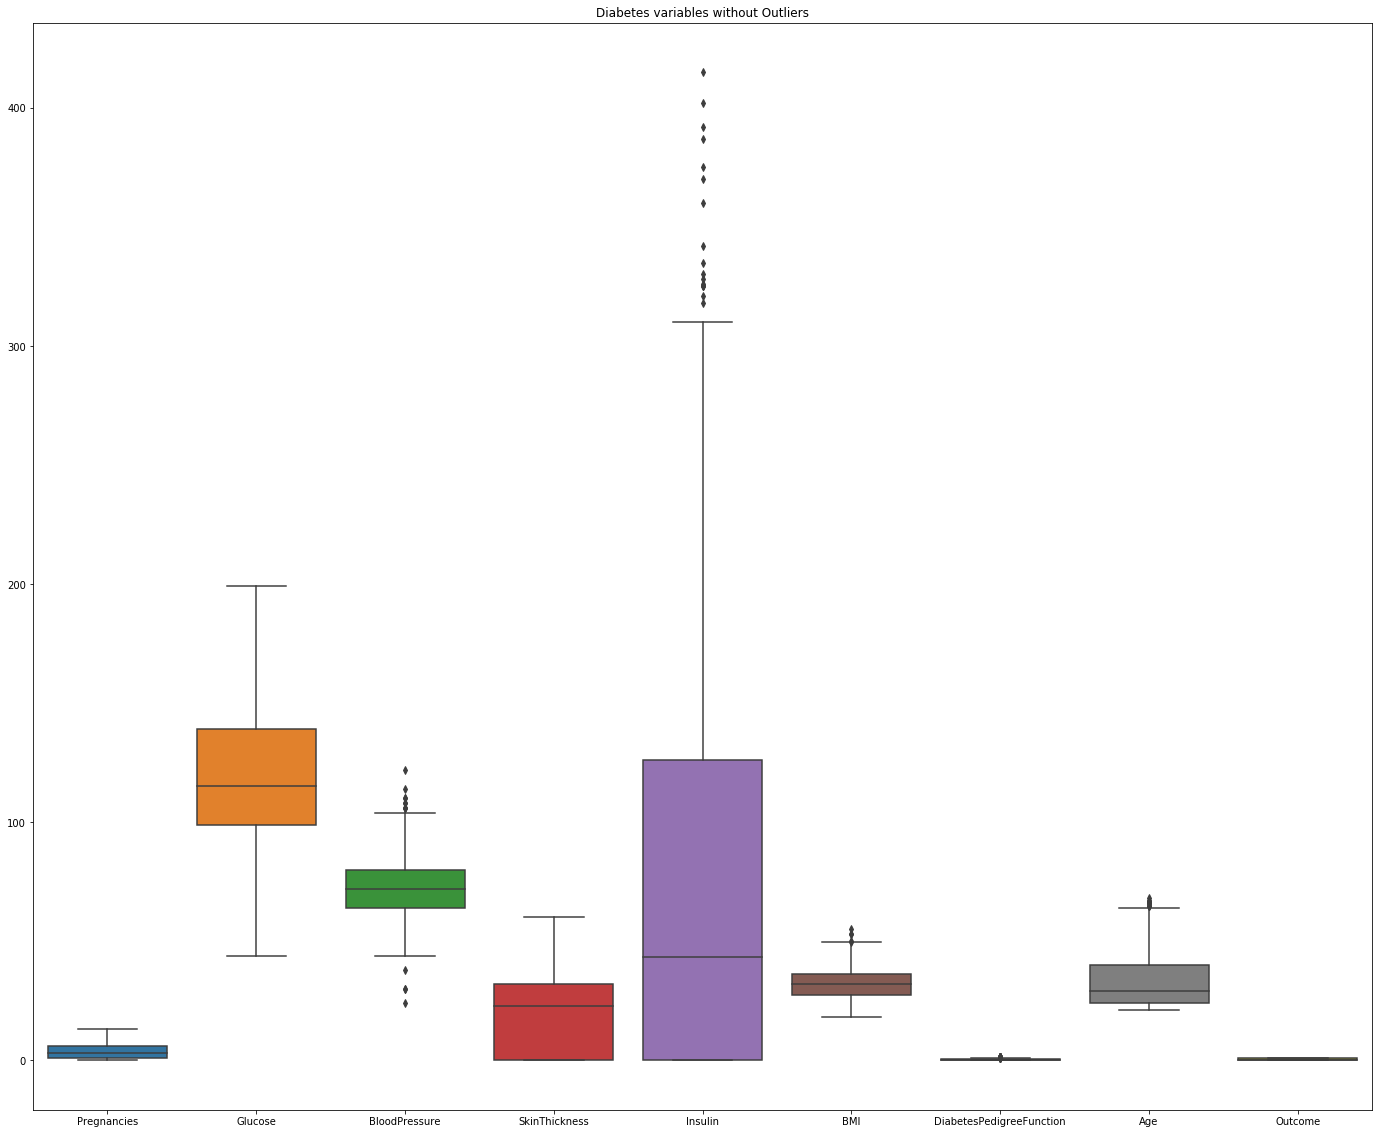

In [1367]:
# Realizamos nuevamente el análisis grafico con la misma variable anterior y observamos que existen menos outliers
fig=plt.figure(figsize=(24,20))
df2_box = sns.boxplot(data= df_test_so).set_title("Diabetes variables without Outliers")

In [1368]:
# Como podemos observar tanto en los máximos, minimos y std varían reduciendoce 
df_d.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [1369]:
df_test_so.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,3.845930,120.293605,72.345930,20.787791,72.507267,32.209157,0.454555,33.094477,0.329942
std,3.279256,30.005790,12.312859,15.405391,90.106939,6.618891,0.284527,11.436990,0.470534
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,23.000000,43.500000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,126.000000,36.300000,0.605500,40.000000,1.000000
max,13.000000,199.000000,122.000000,60.000000,415.000000,55.000000,1.461000,68.000000,1.000000


## Normalización

En base a la distribución de los datos, creemos que es necesario normalizar los datos debido a que hay algunas variables como la insulina y la glucosa que presentan una gran desviación en relación al resto de las variables.

In [1370]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_models =scaler.fit(df_test_so.drop(["Outcome"],axis=1))
df_pred_norm = pd.DataFrame(df_models.transform(df_test_so.drop(["Outcome"],axis=1)))
df_pred_norm.columns = df_test_so.drop(["Outcome"],axis=1).columns
df_test_so_n = df_pred_norm

In [1371]:
# Unificamos el dataset normalizado con la variable objetivo "Outcome"
df_test_so_n.index = df_test_so.index # igualamos los index de cada dataset
df_test_so_no = pd.concat([df_test_so_n,df_test_so.Outcome], axis=1, join='inner') # concatenamos ambos datasets

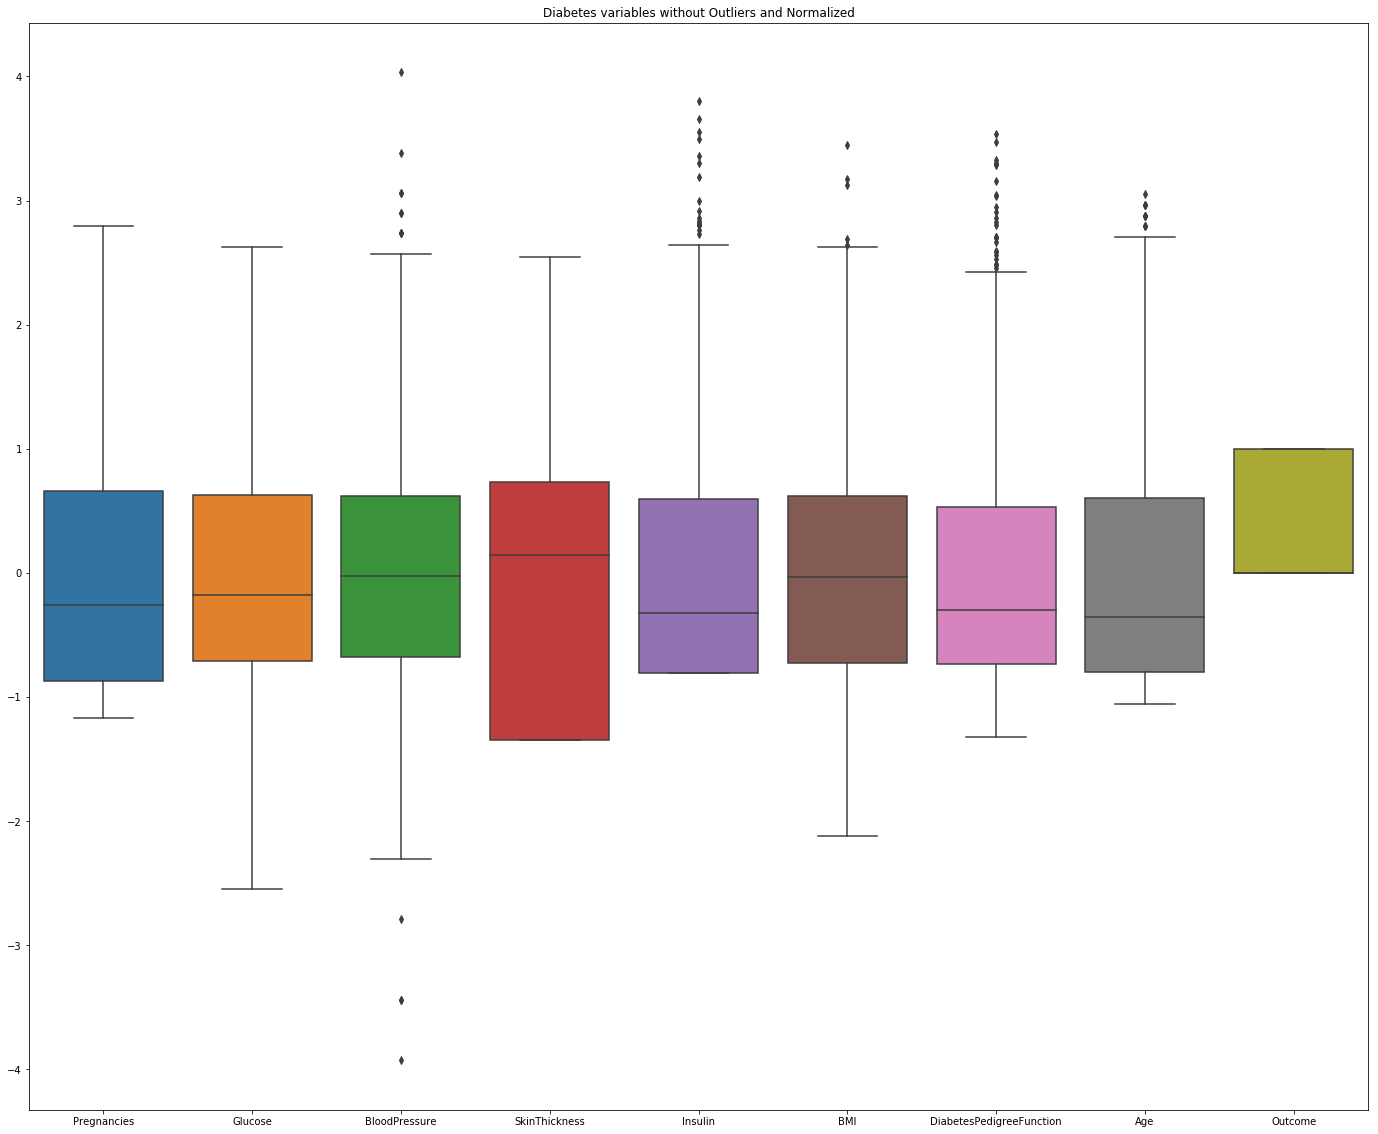

In [1372]:
# Realizamos nuevamente el análisis grafico sin outliers y normalizados
fig=plt.figure(figsize=(24,20))
df3_box = sns.boxplot(data= df_test_so_no).set_title("Diabetes variables without Outliers and Normalized")

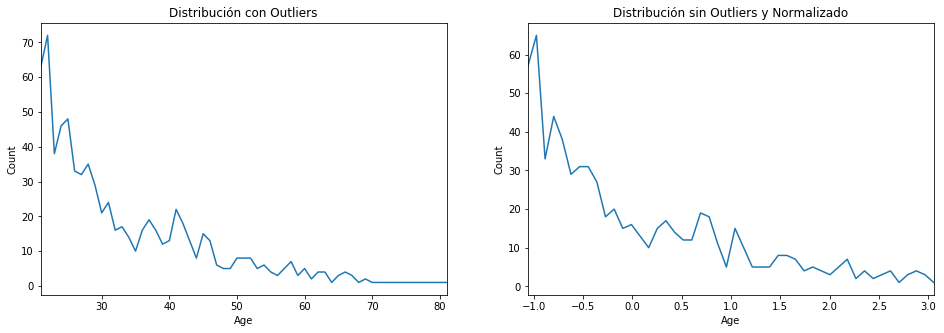

In [1373]:
# En base al recorte de registros según la eliminación de outliers podemos observar la siguiente distribución:
fig=plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
df_d.groupby("Age").count()["Glucose"].plot()
plt.title("Distribución con Outliers")
plt.ylabel("Count")

"""
plt.subplot(1,2,2)
df_test_so.groupby("Outcome").count()["Age"].plot()
plt.title("Outcome sin Outliers")
plt.ylabel("Count")
"""
plt.subplot(1,2,2)
df_test_so_no.groupby("Age").count()["Glucose"].plot()
plt.title("Distribución sin Outliers y Normalizado")
plt.ylabel("Count")

plt.show()

### <b>Paso 4.</b> Matriz de Correlaciones

Text(0.5, 1.0, 'Matriz de Correlaciones')

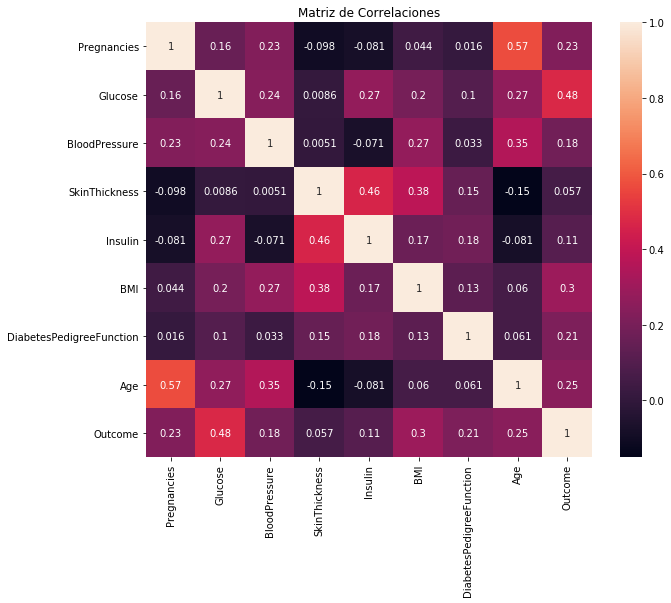

In [1374]:
# Aquí podemos observar las correlaciónes directas e indirectas entre las diferentes variables:
 # Destacamos las variables "BMI" y "Glucose" como aquellas con mayor contraste vs la variable objetivo "Outcome"
corr2 = df_test_so_no.corr()
fig=plt.figure(figsize=(10,8))
ax = plt.axes()
sns.heatmap(corr2, 
        xticklabels=corr2.columns,
        yticklabels=corr2.columns, annot=True)
ax.set_title('Matriz de Correlaciones')

### <b>Paso 5.</b> Divición de datos y Entrenamiento del modelo

In [1375]:
X = df_test_so_no.drop(["Outcome"],axis=1) # Variables del modelo sin label
y = df_test_so_no["Outcome"] # label o target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

print("Longitud de Train: ", len(X_train))
print("Longitud de Test: ", len(X_test))

Longitud de Train:  516
Longitud de Test:  172


#### Revisión de variables más importantes

In [1376]:
# Para encontra las variables más importantes utilizaremos el algoritmo de Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
# Modelo a utilizar
forest = RandomForestClassifier(n_estimators=1000, random_state=0, max_depth = None, 
                                   min_samples_split = 2, min_samples_leaf = 1, n_jobs=5) 
# Entrenamiento de lo modelo
forest.fit(X_train,y_train) 
print("Score con Random Forest Classifier :", forest.score(X_test,y_test) )

# El nivel de importancia o aporte de cada variable al modelo para acotarlo a aquellas variables.
rank_var = pd.DataFrame(list(zip(list(X),list(forest.feature_importances_)))).sort_values([1], ascending=False)
rank_var.rename(columns={0:'Var', 1:'Ranking'},inplace=True)
rank_var

Score con Random Forest Classifier : 0.7674418604651163


,Var,Ranking
1,Glucose,0.267080
5,BMI,0.157515
7,Age,0.132563
6,DiabetesPedigreeFunction,0.126786
2,BloodPressure,0.088935
0,Pregnancies,0.084880
4,Insulin,0.074313
3,SkinThickness,0.067927


**Uso de modelo Neural Network **

In [1377]:
model = Sequential()

In [1378]:
# Añadimos cada capa teniendo en cuenta que la incial tendrá un input de 8 variables y la capa 
 # final tendra un output binario, por lo cual usamos la función sigmoid

model.add(Dense(8,input_shape=(8,), activation="tanh"))
model.add(Dense(4, activation="tanh"))
model.add(Dense(1, activation="tanh")) 
model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy', metrics=["accuracy"]) 

In [1379]:
model.fit(X_train, y_train, epochs=500, verbose=1)

Train on 516 samples
Epoch 1/500
516/516 [==============================] - 0s 900us/sample - loss: 3.0733 - accuracy: 0.6008
Epoch 2/500
516/516 [==============================] - 0s 63us/sample - loss: 1.9752 - accuracy: 0.6434
Epoch 3/500
516/516 [==============================] - 0s 63us/sample - loss: 1.5882 - accuracy: 0.6764
Epoch 4/500
516/516 [==============================] - 0s 64us/sample - loss: 1.1329 - accuracy: 0.6977
Epoch 5/500
516/516 [==============================] - 0s 61us/sample - loss: 1.0410 - accuracy: 0.6996
Epoch 6/500
516/516 [==============================] - 0s 67us/sample - loss: 0.9816 - accuracy: 0.7035
Epoch 7/500
516/516 [==============================] - 0s 63us/sample - loss: 0.9175 - accuracy: 0.7112
Epoch 8/500
516/516 [==============================] - 0s 62us/sample - loss: 0.8481 - accuracy: 0.7132
Epoch 9/500
516/516 [==============================] - 0s 62us/sample - loss: 0.8091 - accuracy: 0.7190
Epoch 10/500
516/516 [====================

516/516 [==============================] - 0s 70us/sample - loss: 0.4270 - accuracy: 0.8043
Epoch 79/500
516/516 [==============================] - 0s 69us/sample - loss: 0.4264 - accuracy: 0.8004
Epoch 80/500
516/516 [==============================] - 0s 71us/sample - loss: 0.4263 - accuracy: 0.7965
Epoch 81/500
516/516 [==============================] - 0s 72us/sample - loss: 0.4253 - accuracy: 0.7907
Epoch 82/500
516/516 [==============================] - 0s 77us/sample - loss: 0.4227 - accuracy: 0.8043
Epoch 83/500
516/516 [==============================] - 0s 76us/sample - loss: 0.4233 - accuracy: 0.7984
Epoch 84/500
516/516 [==============================] - 0s 66us/sample - loss: 0.4221 - accuracy: 0.8043
Epoch 85/500
516/516 [==============================] - 0s 74us/sample - loss: 0.4215 - accuracy: 0.8062
Epoch 86/500
516/516 [==============================] - 0s 65us/sample - loss: 0.4194 - accuracy: 0.8004
Epoch 87/500
516/516 [==============================] - 0s 63us/samp

516/516 [==============================] - 0s 62us/sample - loss: 0.3634 - accuracy: 0.8140
Epoch 156/500
516/516 [==============================] - 0s 62us/sample - loss: 0.3635 - accuracy: 0.8178
Epoch 157/500
516/516 [==============================] - 0s 65us/sample - loss: 0.3632 - accuracy: 0.8043
Epoch 158/500
516/516 [==============================] - 0s 65us/sample - loss: 0.3668 - accuracy: 0.8140
Epoch 159/500
516/516 [==============================] - 0s 63us/sample - loss: 0.3649 - accuracy: 0.8081
Epoch 160/500
516/516 [==============================] - 0s 64us/sample - loss: 0.3624 - accuracy: 0.8081
Epoch 161/500
516/516 [==============================] - 0s 63us/sample - loss: 0.3679 - accuracy: 0.8140
Epoch 162/500
516/516 [==============================] - 0s 62us/sample - loss: 0.3640 - accuracy: 0.8140
Epoch 163/500
516/516 [==============================] - 0s 65us/sample - loss: 0.3591 - accuracy: 0.8120
Epoch 164/500
516/516 [==============================] - 0s 

516/516 [==============================] - 0s 60us/sample - loss: 0.4004 - accuracy: 0.8159
Epoch 233/500
516/516 [==============================] - 0s 65us/sample - loss: 0.3986 - accuracy: 0.8178
Epoch 234/500
516/516 [==============================] - 0s 64us/sample - loss: 0.3981 - accuracy: 0.8178
Epoch 235/500
516/516 [==============================] - 0s 66us/sample - loss: 0.3970 - accuracy: 0.8159
Epoch 236/500
516/516 [==============================] - 0s 68us/sample - loss: 0.3948 - accuracy: 0.8217
Epoch 237/500
516/516 [==============================] - 0s 64us/sample - loss: 0.3942 - accuracy: 0.8159
Epoch 238/500
516/516 [==============================] - 0s 65us/sample - loss: 0.3938 - accuracy: 0.8236
Epoch 239/500
516/516 [==============================] - 0s 68us/sample - loss: 0.3924 - accuracy: 0.8178
Epoch 240/500
516/516 [==============================] - 0s 69us/sample - loss: 0.3914 - accuracy: 0.8256
Epoch 241/500
516/516 [==============================] - 0s 

516/516 [==============================] - 0s 65us/sample - loss: 0.3277 - accuracy: 0.8236
Epoch 310/500
516/516 [==============================] - 0s 65us/sample - loss: 0.3258 - accuracy: 0.8275
Epoch 311/500
516/516 [==============================] - 0s 65us/sample - loss: 0.3245 - accuracy: 0.8256
Epoch 312/500
516/516 [==============================] - 0s 64us/sample - loss: 0.3229 - accuracy: 0.8275
Epoch 313/500
516/516 [==============================] - 0s 66us/sample - loss: 0.3239 - accuracy: 0.8217
Epoch 314/500
516/516 [==============================] - 0s 69us/sample - loss: 0.3260 - accuracy: 0.8178
Epoch 315/500
516/516 [==============================] - 0s 71us/sample - loss: 0.3227 - accuracy: 0.8236
Epoch 316/500
516/516 [==============================] - 0s 66us/sample - loss: 0.3214 - accuracy: 0.8256
Epoch 317/500
516/516 [==============================] - 0s 64us/sample - loss: 0.3254 - accuracy: 0.8295
Epoch 318/500
516/516 [==============================] - 0s 

516/516 [==============================] - 0s 61us/sample - loss: 0.3031 - accuracy: 0.8353
Epoch 387/500
516/516 [==============================] - 0s 66us/sample - loss: 0.3038 - accuracy: 0.8333
Epoch 388/500
516/516 [==============================] - 0s 66us/sample - loss: 0.3064 - accuracy: 0.8295
Epoch 389/500
516/516 [==============================] - 0s 63us/sample - loss: 0.3027 - accuracy: 0.8391
Epoch 390/500
516/516 [==============================] - 0s 67us/sample - loss: 0.3015 - accuracy: 0.8314
Epoch 391/500
516/516 [==============================] - 0s 62us/sample - loss: 0.3007 - accuracy: 0.8314
Epoch 392/500
516/516 [==============================] - 0s 65us/sample - loss: 0.3027 - accuracy: 0.8333
Epoch 393/500
516/516 [==============================] - 0s 64us/sample - loss: 0.3030 - accuracy: 0.8333
Epoch 394/500
516/516 [==============================] - 0s 62us/sample - loss: 0.3042 - accuracy: 0.8314
Epoch 395/500
516/516 [==============================] - 0s 

516/516 [==============================] - 0s 66us/sample - loss: 0.3499 - accuracy: 0.8314
Epoch 464/500
516/516 [==============================] - 0s 62us/sample - loss: 0.3228 - accuracy: 0.8275
Epoch 465/500
516/516 [==============================] - 0s 63us/sample - loss: 0.3179 - accuracy: 0.8236
Epoch 466/500
516/516 [==============================] - 0s 68us/sample - loss: 0.3161 - accuracy: 0.8217
Epoch 467/500
516/516 [==============================] - 0s 66us/sample - loss: 0.3134 - accuracy: 0.8333
Epoch 468/500
516/516 [==============================] - 0s 64us/sample - loss: 0.3123 - accuracy: 0.8314
Epoch 469/500
516/516 [==============================] - 0s 70us/sample - loss: 0.3110 - accuracy: 0.8275
Epoch 470/500
516/516 [==============================] - 0s 64us/sample - loss: 0.3096 - accuracy: 0.8256
Epoch 471/500
516/516 [==============================] - 0s 67us/sample - loss: 0.3085 - accuracy: 0.8391
Epoch 472/500
516/516 [==============================] - 0s 

In [1380]:
Coste_sobre_test = model.evaluate(X_test, y_test)
Coste_sobre_test

172/172 [==============================] - 0s 854us/sample - loss: 1.1545 - accuracy: 0.7791


[1.1544935758723769, 0.7790698]

In [1381]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("Accurancy de train es: ",accuracy_score(y_train, y_train_pred))
print("Accurancy de test es: ",accuracy_score(y_test, y_test_pred))

Accurancy de train es:  0.8468992248062015
Accurancy de test es:  0.7790697674418605


In [1382]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       114
           1       0.66      0.71      0.68        58

    accuracy                           0.78       172
   macro avg       0.75      0.76      0.76       172
weighted avg       0.78      0.78      0.78       172



### Ejecución de los modelos solo con las variables más importantes

División de Train y Test

In [1383]:
X = df_test_so_no.drop(["Outcome", "BloodPressure", "Pregnancies", "Insulin", "SkinThickness"],axis=1) # Variables del modelo sin label
y = df_test_so_no["Outcome"] # label o target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

print("Longitud de Train: ", len(X_train))
print("Longitud de Test: ", len(X_test))

Longitud de Train:  516
Longitud de Test:  172


Con Random Forest Classifier

In [1384]:
# Para encontra las variables más importantes utilizaremos el algoritmo de Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
# Modelo a utilizar
forest = RandomForestClassifier(n_estimators=1000, random_state=0, max_depth = None, 
                                   min_samples_split = 2, min_samples_leaf = 1, n_jobs=5) 
# Entrenamiento de lo modelo
forest.fit(X_train,y_train) 
print("Score con Random Forest Classifier :", forest.score(X_test,y_test))

Score con Random Forest Classifier : 0.75


Con Neural Networks

In [1385]:
# Añadimos cada capa teniendo en cuenta que la incial tendrá un input de 8 variables y la capa 
 # final tendra un output binario, por lo cual usamos la función sigmoid
model = Sequential()
model.add(Dense(4,input_shape=(4,), activation="tanh"))
model.add(Dense(4, activation="tanh"))
model.add(Dense(1, activation="tanh")) 
model.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy', metrics=["accuracy"])
model.fit(X_train, y_train, epochs=500, verbose=1)

Train on 516 samples
Epoch 1/500
516/516 [==============================] - 1s 2ms/sample - loss: 1.3192 - accuracy: 0.6977
Epoch 2/500
516/516 [==============================] - 0s 72us/sample - loss: 0.9815 - accuracy: 0.7597
Epoch 3/500
516/516 [==============================] - 0s 72us/sample - loss: 0.9560 - accuracy: 0.7791
Epoch 4/500
516/516 [==============================] - 0s 70us/sample - loss: 0.8564 - accuracy: 0.7733
Epoch 5/500
516/516 [==============================] - 0s 71us/sample - loss: 0.7942 - accuracy: 0.7733
Epoch 6/500
516/516 [==============================] - 0s 73us/sample - loss: 0.7069 - accuracy: 0.7578
Epoch 7/500
516/516 [==============================] - 0s 68us/sample - loss: 0.5884 - accuracy: 0.7616
Epoch 8/500
516/516 [==============================] - 0s 70us/sample - loss: 0.5851 - accuracy: 0.7752
Epoch 9/500
516/516 [==============================] - 0s 77us/sample - loss: 0.5354 - accuracy: 0.7674
Epoch 10/500
516/516 [======================

516/516 [==============================] - 0s 63us/sample - loss: 0.4789 - accuracy: 0.7926
Epoch 79/500
516/516 [==============================] - 0s 64us/sample - loss: 0.4784 - accuracy: 0.7965
Epoch 80/500
516/516 [==============================] - 0s 66us/sample - loss: 0.4777 - accuracy: 0.7984
Epoch 81/500
516/516 [==============================] - 0s 67us/sample - loss: 0.4773 - accuracy: 0.7926
Epoch 82/500
516/516 [==============================] - 0s 66us/sample - loss: 0.4781 - accuracy: 0.7965
Epoch 83/500
516/516 [==============================] - 0s 64us/sample - loss: 0.4815 - accuracy: 0.7907
Epoch 84/500
516/516 [==============================] - 0s 64us/sample - loss: 0.4651 - accuracy: 0.7849
Epoch 85/500
516/516 [==============================] - 0s 60us/sample - loss: 0.4551 - accuracy: 0.7926
Epoch 86/500
516/516 [==============================] - 0s 63us/sample - loss: 0.4547 - accuracy: 0.7868
Epoch 87/500
516/516 [==============================] - 0s 63us/samp

516/516 [==============================] - 0s 65us/sample - loss: 0.4327 - accuracy: 0.7984
Epoch 156/500
516/516 [==============================] - 0s 64us/sample - loss: 0.4322 - accuracy: 0.7984
Epoch 157/500
516/516 [==============================] - 0s 69us/sample - loss: 0.4322 - accuracy: 0.7965
Epoch 158/500
516/516 [==============================] - 0s 67us/sample - loss: 0.4311 - accuracy: 0.8004
Epoch 159/500
516/516 [==============================] - 0s 66us/sample - loss: 0.4310 - accuracy: 0.8023
Epoch 160/500
516/516 [==============================] - 0s 66us/sample - loss: 0.4307 - accuracy: 0.8043
Epoch 161/500
516/516 [==============================] - 0s 68us/sample - loss: 0.4307 - accuracy: 0.8062
Epoch 162/500
516/516 [==============================] - 0s 71us/sample - loss: 0.4304 - accuracy: 0.8023
Epoch 163/500
516/516 [==============================] - 0s 65us/sample - loss: 0.4308 - accuracy: 0.8023
Epoch 164/500
516/516 [==============================] - 0s 

516/516 [==============================] - 0s 67us/sample - loss: 0.4246 - accuracy: 0.7984
Epoch 233/500
516/516 [==============================] - 0s 67us/sample - loss: 0.4228 - accuracy: 0.7965
Epoch 234/500
516/516 [==============================] - 0s 68us/sample - loss: 0.4221 - accuracy: 0.8043
Epoch 235/500
516/516 [==============================] - 0s 67us/sample - loss: 0.4247 - accuracy: 0.7984
Epoch 236/500
516/516 [==============================] - 0s 68us/sample - loss: 0.4226 - accuracy: 0.8062
Epoch 237/500
516/516 [==============================] - 0s 64us/sample - loss: 0.4213 - accuracy: 0.8004
Epoch 238/500
516/516 [==============================] - 0s 68us/sample - loss: 0.4226 - accuracy: 0.8023
Epoch 239/500
516/516 [==============================] - 0s 64us/sample - loss: 0.4228 - accuracy: 0.7965
Epoch 240/500
516/516 [==============================] - 0s 68us/sample - loss: 0.4212 - accuracy: 0.8023
Epoch 241/500
516/516 [==============================] - 0s 

516/516 [==============================] - 0s 64us/sample - loss: 0.4166 - accuracy: 0.7984
Epoch 310/500
516/516 [==============================] - 0s 69us/sample - loss: 0.4150 - accuracy: 0.7946
Epoch 311/500
516/516 [==============================] - 0s 64us/sample - loss: 0.4146 - accuracy: 0.8004
Epoch 312/500
516/516 [==============================] - 0s 63us/sample - loss: 0.4155 - accuracy: 0.8004
Epoch 313/500
516/516 [==============================] - 0s 66us/sample - loss: 0.4175 - accuracy: 0.7946
Epoch 314/500
516/516 [==============================] - 0s 64us/sample - loss: 0.4233 - accuracy: 0.7926
Epoch 315/500
516/516 [==============================] - 0s 64us/sample - loss: 0.4151 - accuracy: 0.7946
Epoch 316/500
516/516 [==============================] - 0s 62us/sample - loss: 0.4155 - accuracy: 0.7984
Epoch 317/500
516/516 [==============================] - 0s 63us/sample - loss: 0.4208 - accuracy: 0.7946
Epoch 318/500
516/516 [==============================] - 0s 

516/516 [==============================] - 0s 65us/sample - loss: 0.4313 - accuracy: 0.8023
Epoch 387/500
516/516 [==============================] - 0s 64us/sample - loss: 0.4307 - accuracy: 0.8004
Epoch 388/500
516/516 [==============================] - 0s 64us/sample - loss: 0.4300 - accuracy: 0.8004
Epoch 389/500
516/516 [==============================] - 0s 64us/sample - loss: 0.4294 - accuracy: 0.8023
Epoch 390/500
516/516 [==============================] - 0s 66us/sample - loss: 0.4289 - accuracy: 0.8023
Epoch 391/500
516/516 [==============================] - 0s 62us/sample - loss: 0.4287 - accuracy: 0.8043
Epoch 392/500
516/516 [==============================] - 0s 62us/sample - loss: 0.4283 - accuracy: 0.8043
Epoch 393/500
516/516 [==============================] - 0s 63us/sample - loss: 0.4277 - accuracy: 0.8043
Epoch 394/500
516/516 [==============================] - 0s 65us/sample - loss: 0.4272 - accuracy: 0.8023
Epoch 395/500
516/516 [==============================] - 0s 

516/516 [==============================] - 0s 64us/sample - loss: 0.4163 - accuracy: 0.7965
Epoch 464/500
516/516 [==============================] - 0s 63us/sample - loss: 0.4152 - accuracy: 0.8004
Epoch 465/500
516/516 [==============================] - 0s 65us/sample - loss: 0.4146 - accuracy: 0.8004
Epoch 466/500
516/516 [==============================] - 0s 70us/sample - loss: 0.4144 - accuracy: 0.7984
Epoch 467/500
516/516 [==============================] - 0s 63us/sample - loss: 0.4144 - accuracy: 0.7926
Epoch 468/500
516/516 [==============================] - 0s 68us/sample - loss: 0.4148 - accuracy: 0.7965
Epoch 469/500
516/516 [==============================] - 0s 65us/sample - loss: 0.4141 - accuracy: 0.8004
Epoch 470/500
516/516 [==============================] - 0s 65us/sample - loss: 0.4140 - accuracy: 0.8023
Epoch 471/500
516/516 [==============================] - 0s 68us/sample - loss: 0.4135 - accuracy: 0.7984
Epoch 472/500
516/516 [==============================] - 0s 

In [1386]:
Coste_sobre_test = model.evaluate(X_test, y_test)
Coste_sobre_test

172/172 [==============================] - 0s 735us/sample - loss: 0.4873 - accuracy: 0.6977


[0.4872761701428613, 0.6976744]

In [1389]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("Accurancy de train es: ",accuracy_score(y_train, y_train_pred))
print("Accurancy de test es: ",accuracy_score(y_test, y_test_pred))

Accurancy de train es:  0.8042635658914729
Accurancy de test es:  0.6976744186046512


In [ ]:
print(classification_report(y_test, y_test_pred))